# Data Collection

In [1]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [34]:
data.to_csv("../data/raw/data.csv", index=False)

# Exploration

In [3]:
data.shape

(48895, 16)

In [4]:
#Info about data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#Analysing duplicate ids, since it's the only column that should not have duplicates
print(f"Duplicated IDs: {data['id'].duplicated().sum()}")

Duplicated IDs: 0


In [6]:
#Removing irrelevant data for the training
data.drop(["id", "name", "host_name", "last_review", "reviews_per_month", "latitude", "longitude"], axis=1, inplace=True)
data.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


# Analysis of univariate variables

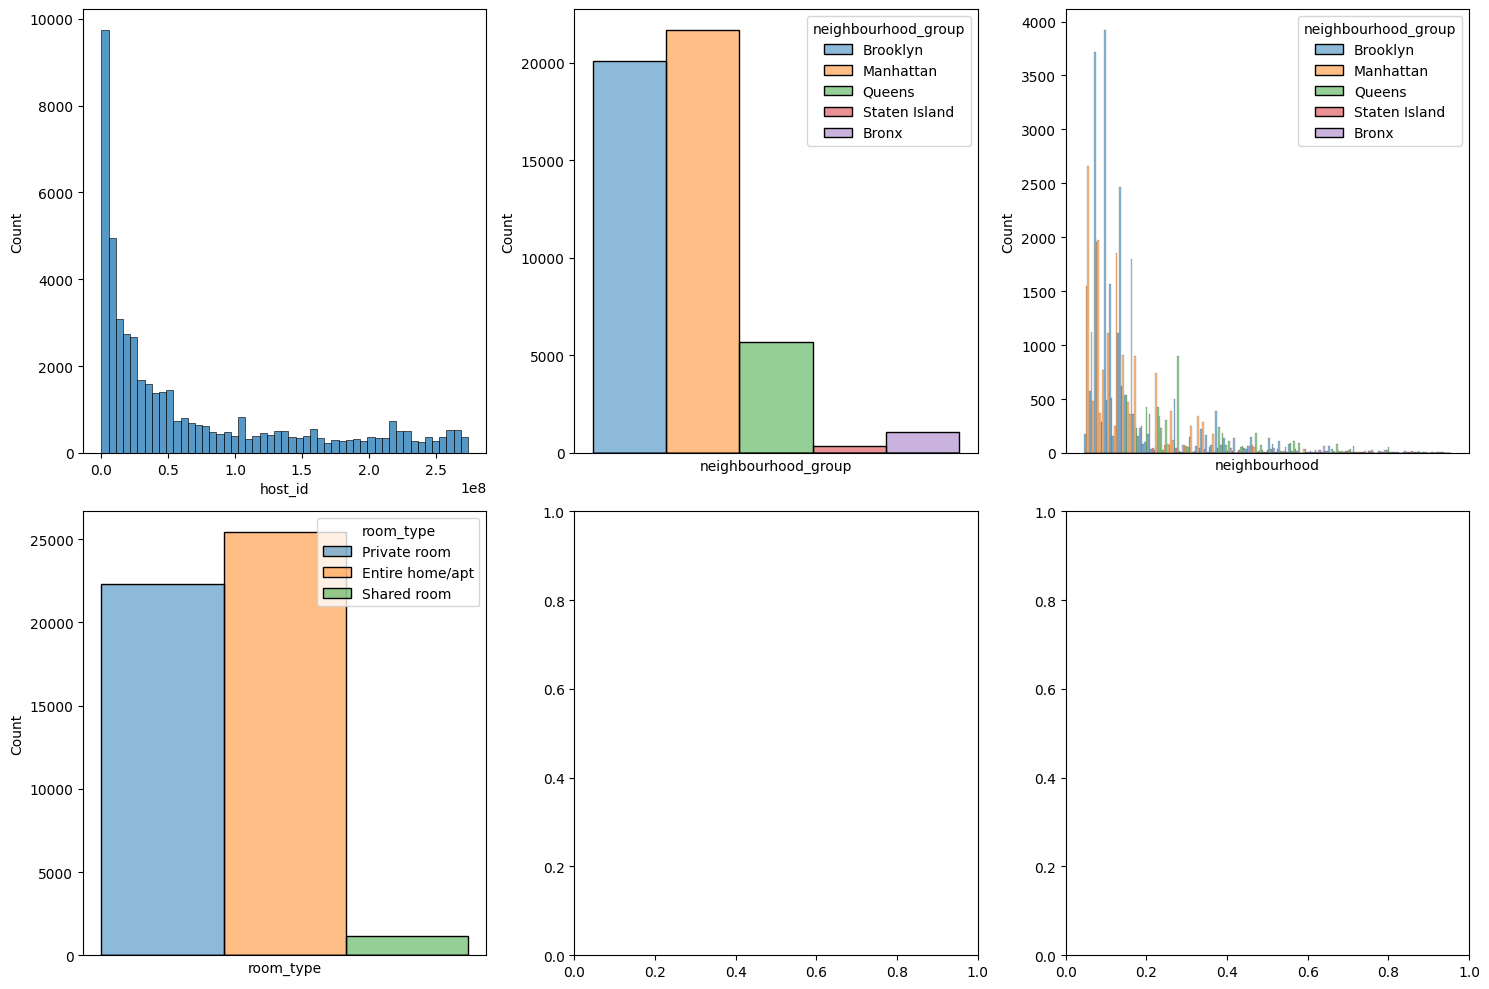

In [7]:
# Analysis of categorical variables
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(ax=axis[0, 0], data=data, x="host_id")
sns.histplot(ax=axis[0, 1], data=data, x="neighbourhood_group", hue="neighbourhood_group").set_xticks([])
sns.histplot(ax=axis[0, 2], data=data, x="neighbourhood", hue="neighbourhood_group", log_scale=True).set_xticks([])
sns.histplot(ax=axis[1, 0], data=data, x="room_type", hue="room_type").set_xticks([])
plt.tight_layout()
plt.show()

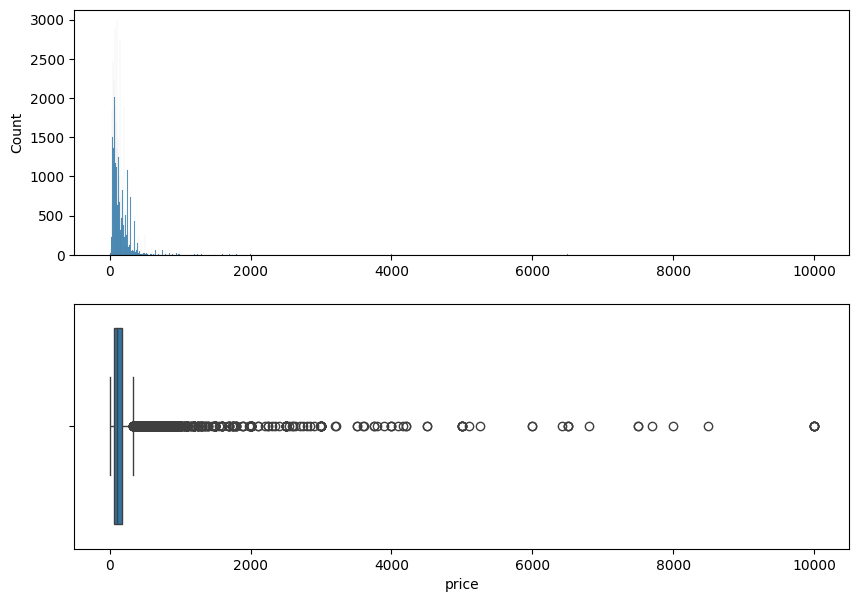

In [8]:
# Analysis of numeric variables
fig, axis = plt.subplots(2, figsize=(10, 7))

sns.histplot(ax=axis[0], data=data, x="price").set(xlabel=None)
sns.boxplot(ax=axis[1], data=data, x="price")

plt.show()

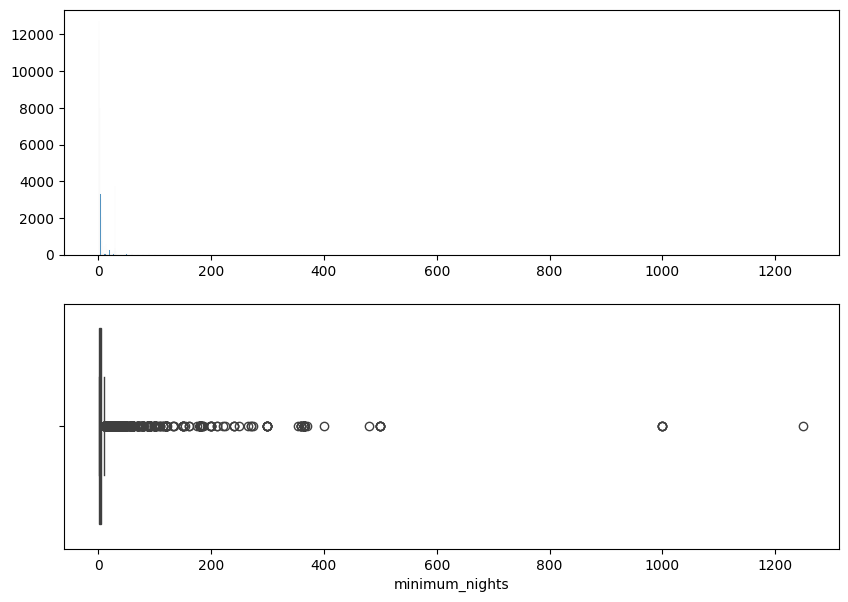

In [9]:
# Analysis of numeric variables
fig, axis = plt.subplots(2, figsize=(10, 7))

sns.histplot(ax=axis[0], data=data, x="minimum_nights").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1], data=data, x="minimum_nights")

plt.show()

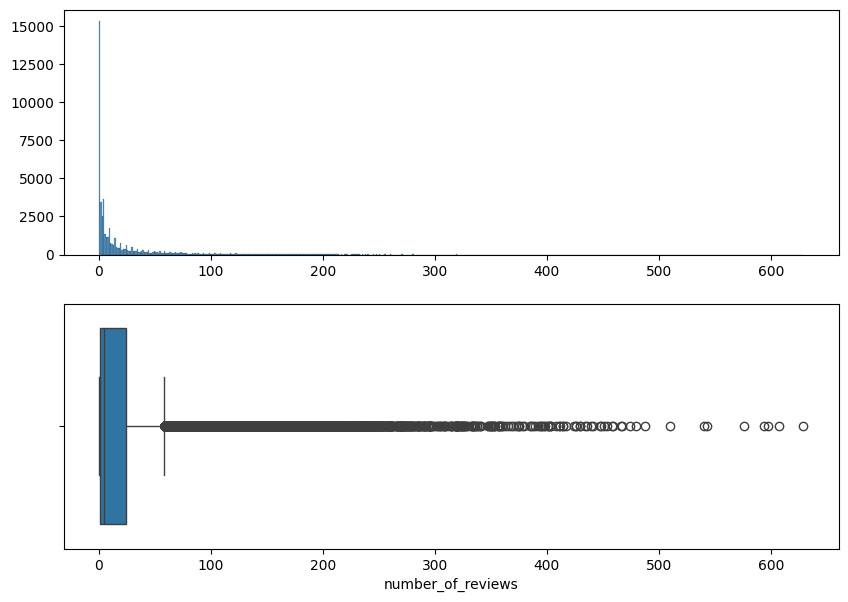

In [10]:
# Analysis of numeric variables
fig, axis = plt.subplots(2, figsize=(10, 7))

sns.histplot(ax=axis[0], data=data, x="number_of_reviews").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1], data=data, x="number_of_reviews")

plt.show()

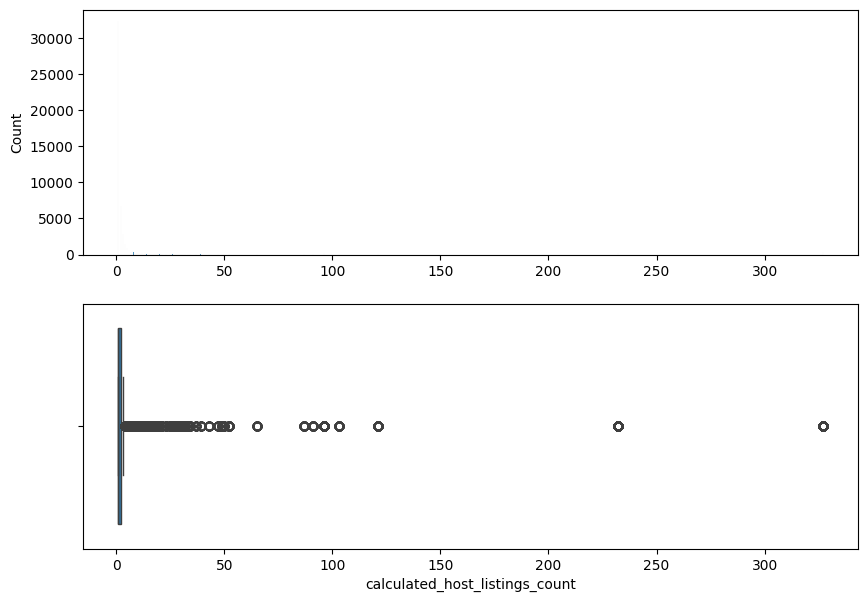

In [11]:
# Analysis of numeric variables
fig, axis = plt.subplots(2, figsize=(10, 7))

sns.histplot(ax=axis[0], data=data, x="calculated_host_listings_count").set(xlabel=None)
sns.boxplot(ax=axis[1], data=data, x="calculated_host_listings_count")

plt.show()

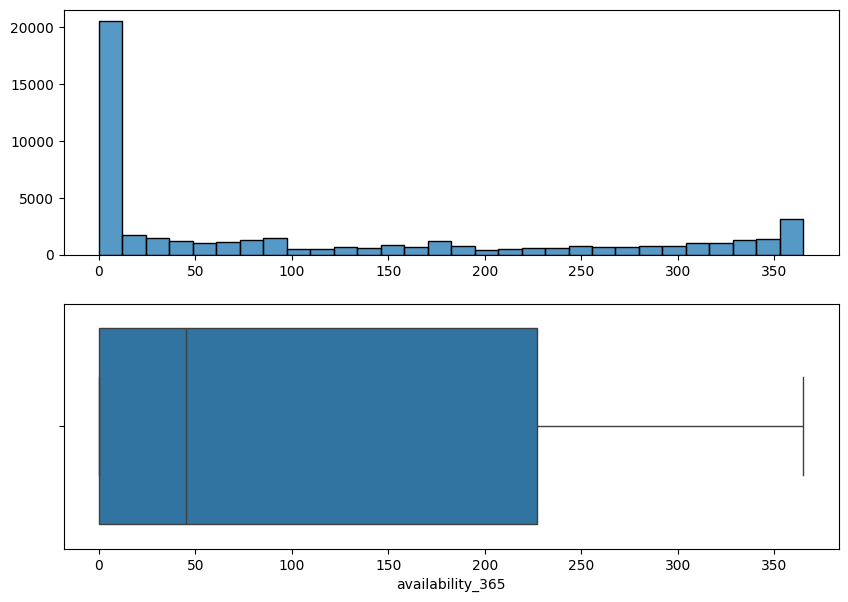

In [12]:
# Analysis of numeric variables
fig, axis = plt.subplots(2, figsize=(10, 7))

sns.histplot(ax=axis[0], data=data, x="availability_365").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1], data=data, x="availability_365")

plt.show()

# Analysis of multivariate variables

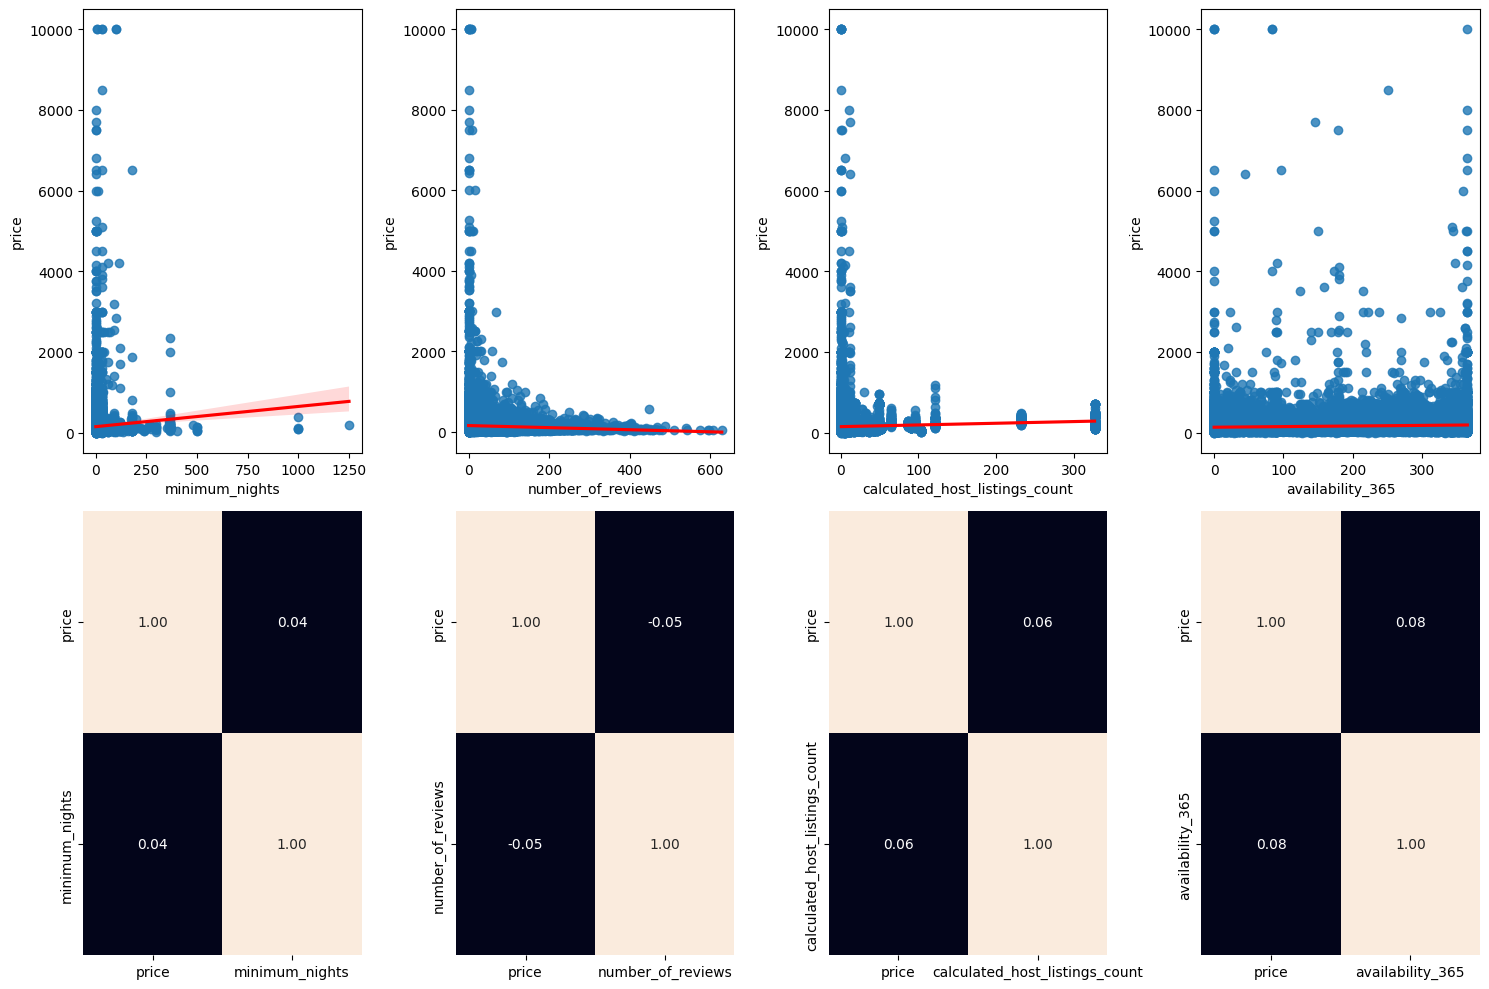

In [13]:
# Numerical-numerical analysis
fig, axis = plt.subplots(2, 4, figsize=(15, 10))

sns.regplot(ax=axis[0, 0], data=data, x="minimum_nights", y="price", line_kws={"color": "red"})
sns.heatmap(data[["price", "minimum_nights"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(ax=axis[0, 1], data=data, x="number_of_reviews", y="price", line_kws={"color": "red"})
sns.heatmap(data[["price", "number_of_reviews"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

sns.regplot(ax=axis[0, 2], data=data, x="calculated_host_listings_count", y="price", line_kws={"color": "red"})
sns.heatmap(data[["price", "calculated_host_listings_count"]].corr(), annot=True, fmt=".2f", ax=axis[1, 2], cbar=False)

sns.regplot(ax=axis[0, 3], data=data, x="availability_365", y="price", line_kws={"color": "red"})
sns.heatmap(data[["price", "availability_365"]].corr(), annot=True, fmt=".2f", ax=axis[1, 3], cbar=False)

plt.tight_layout()
plt.show()

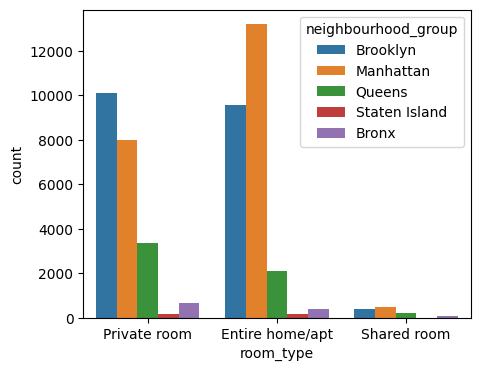

In [14]:
# Categorical-categorial Analysis
fig, axis = plt.subplots(figsize=(5, 4))

sns.countplot(data=data, x="room_type", hue="neighbourhood_group")

plt.show()

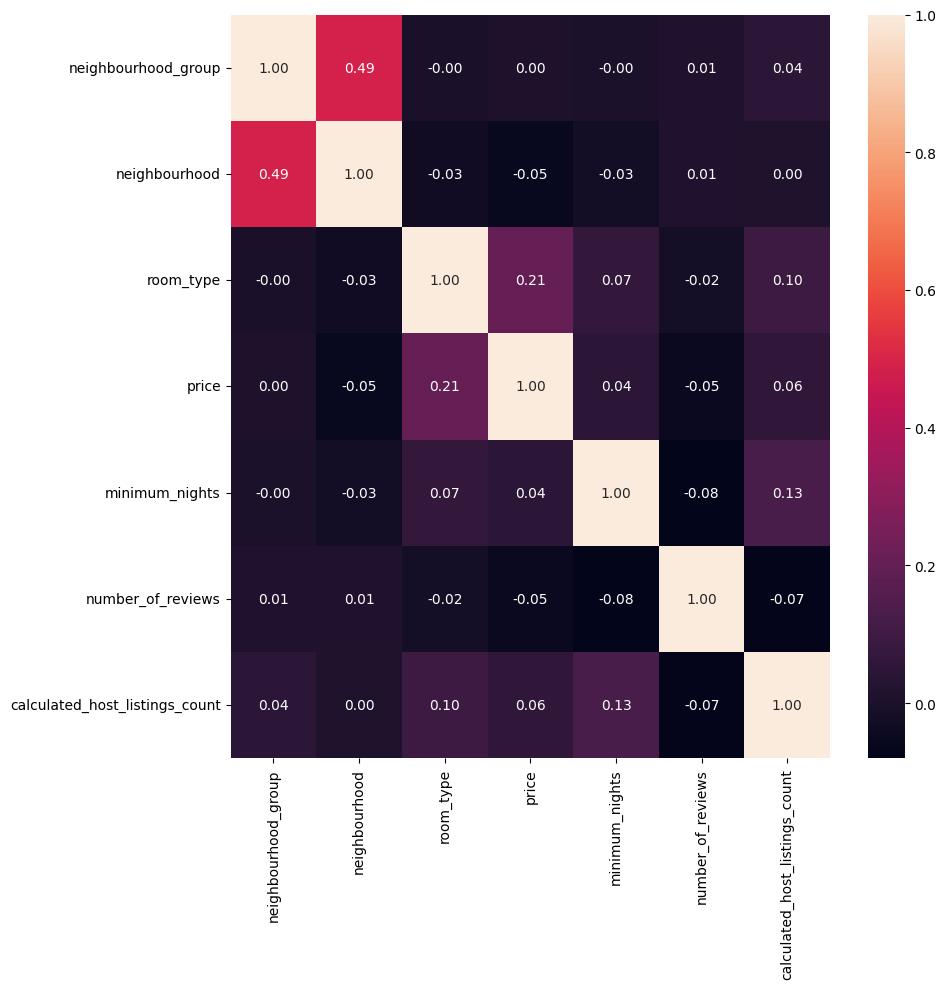

In [15]:
# Correlation Analysis

data.head()
data["neighbourhood_group"] = pd.factorize(data["neighbourhood_group"])[0]
data["neighbourhood"] = pd.factorize(data["neighbourhood"])[0]
data["room_type"] = pd.factorize(data["room_type"])[0]

fig, axis = plt.subplots(figsize=(10, 10))

sns.heatmap(
    data[
        ["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]
    ].corr(),
    annot=True,
    fmt=".2f",
)

plt.tight_layout()
plt.show()

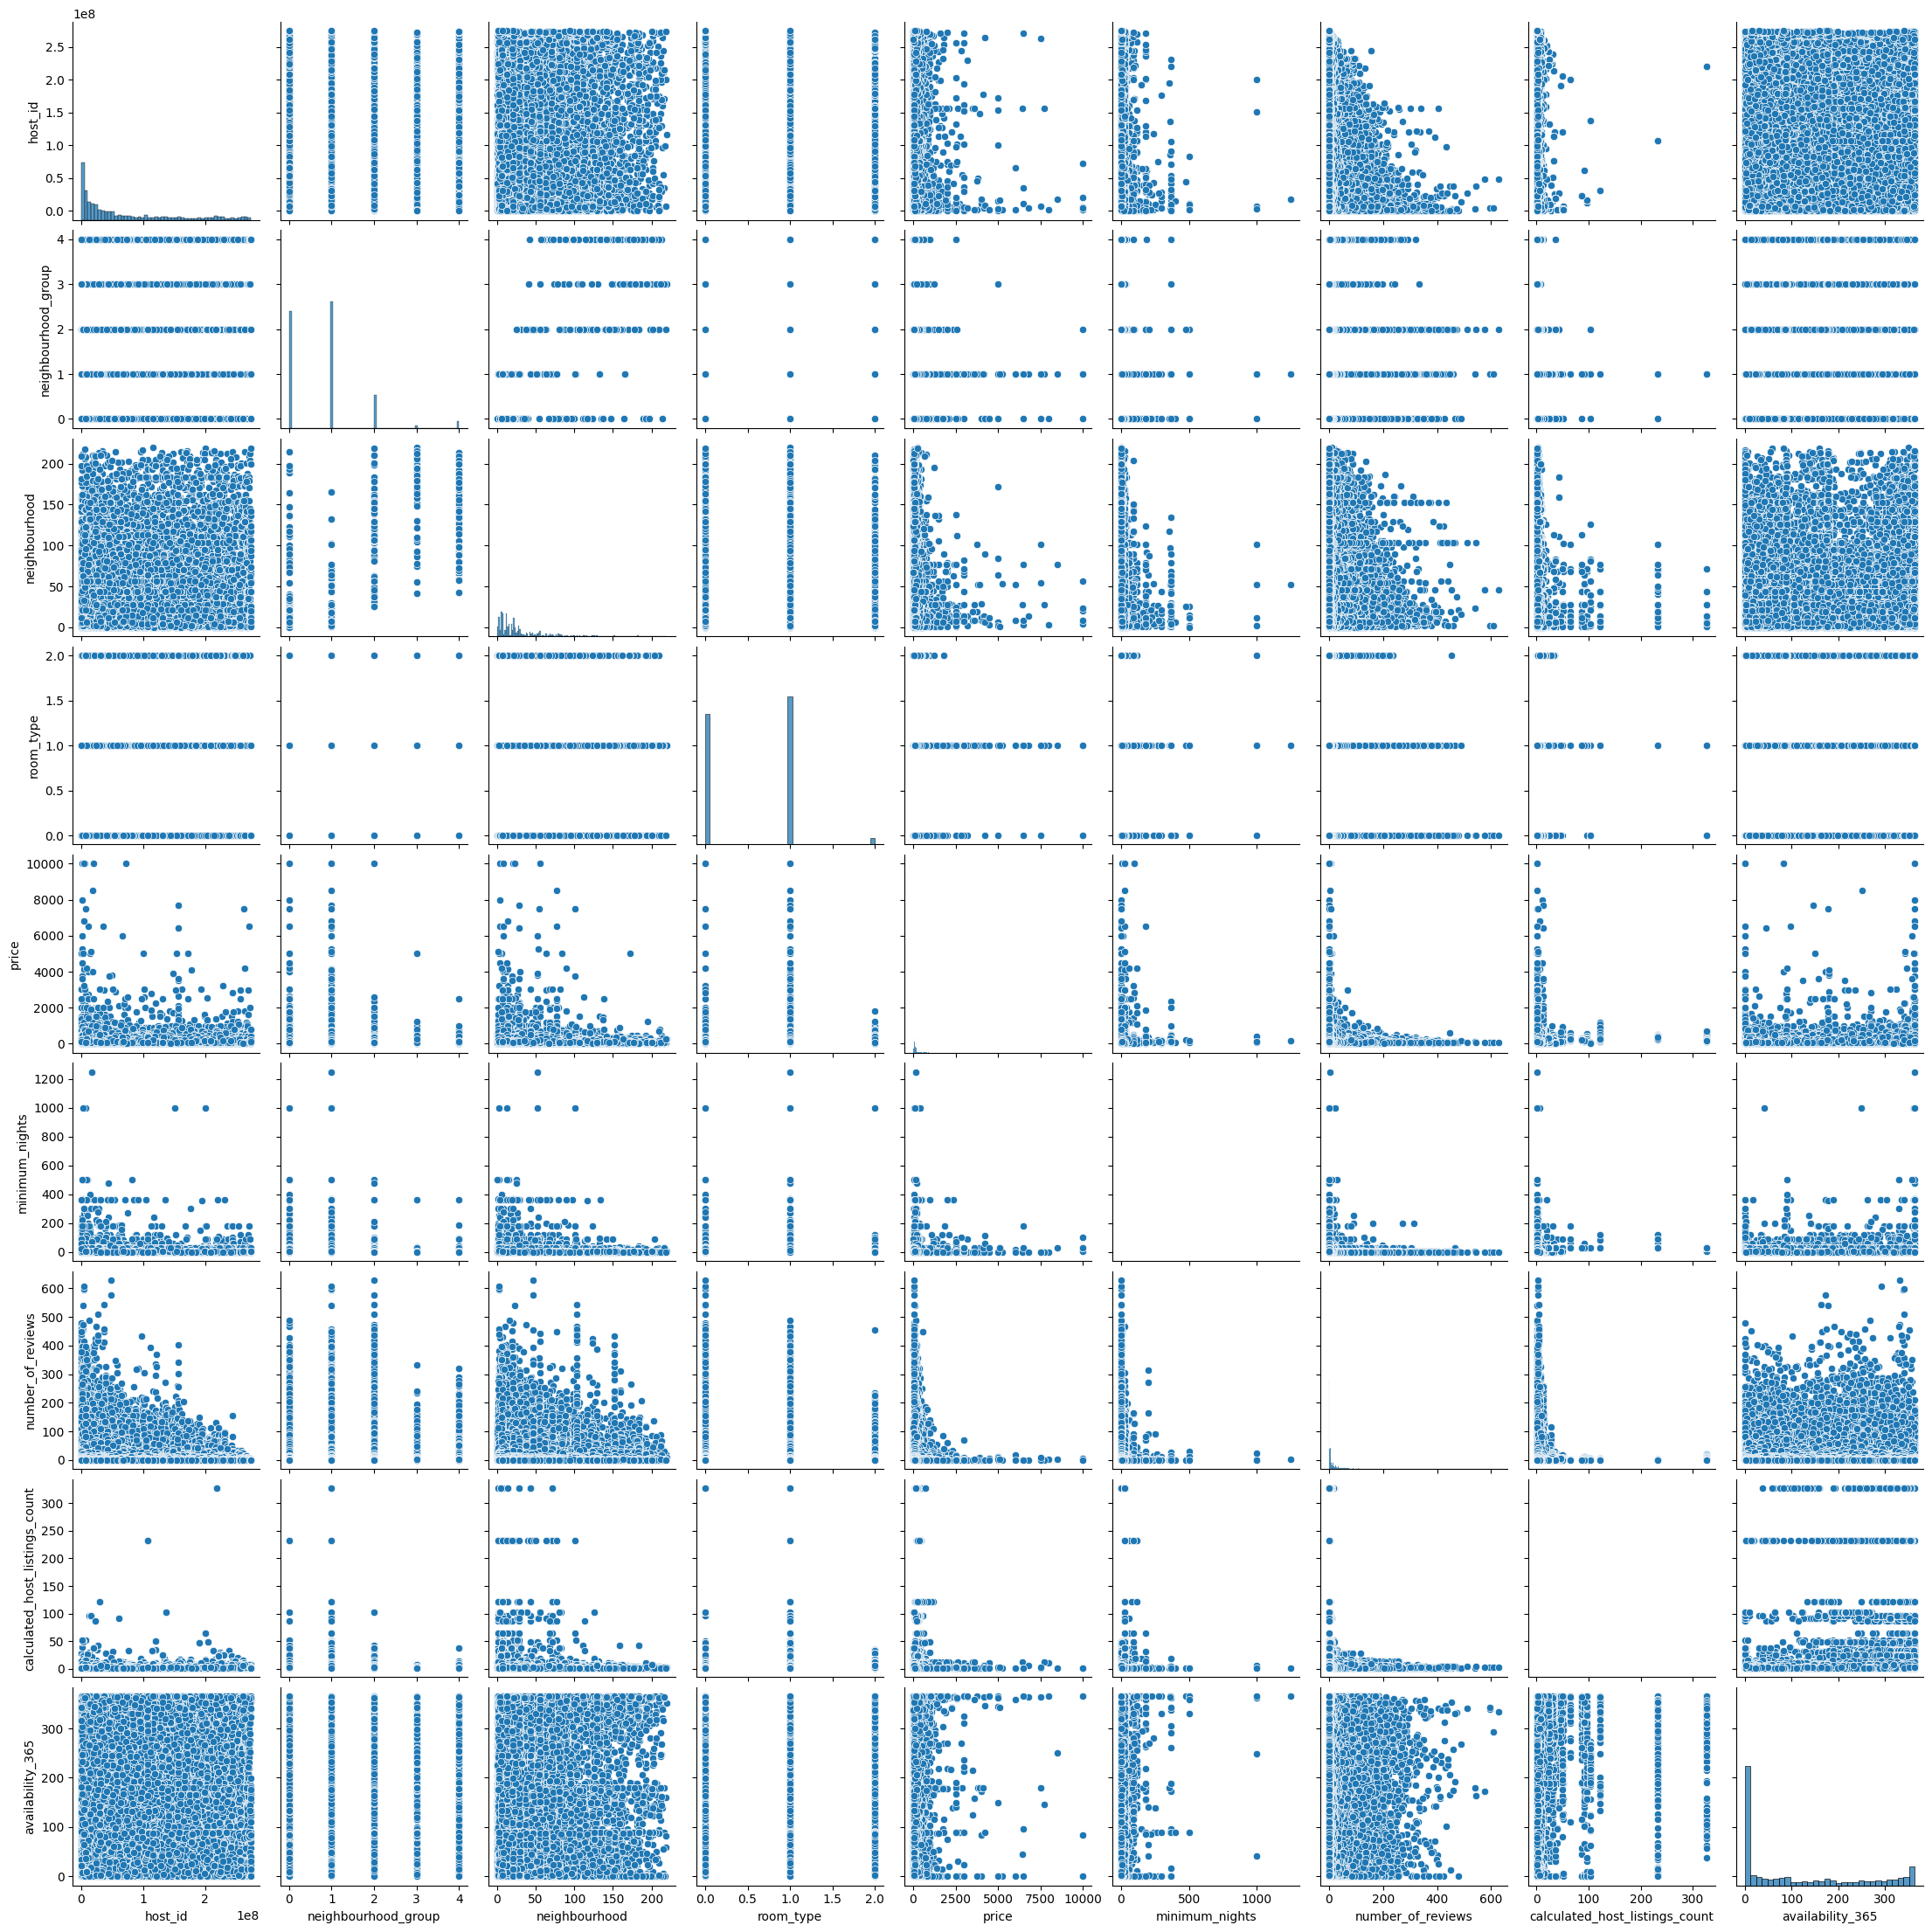

In [16]:
# Full data analysis
sns.pairplot(data=data)

# Feature Engineering

In [17]:
# Outlier Analysis
data.describe()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.844386,34.676634,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,19.000000,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


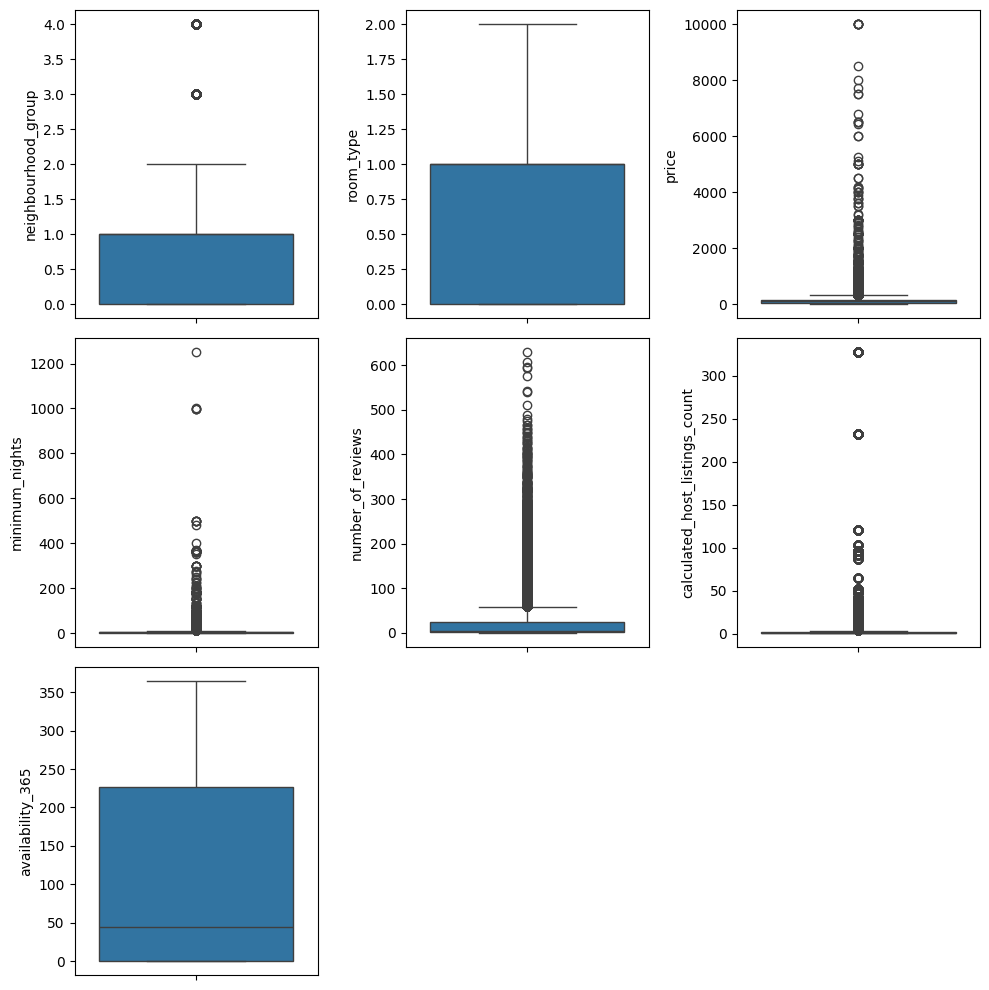

In [18]:
fig, axis = plt.subplots(3, 3, figsize=(10, 10))

sns.boxplot(ax=axis[0, 0], data=data, y="neighbourhood_group")
sns.boxplot(ax=axis[0, 1], data=data, y="room_type")
sns.boxplot(ax=axis[0, 2], data=data, y="price")
sns.boxplot(ax=axis[1, 0], data=data, y="minimum_nights")
sns.boxplot(ax=axis[1, 1], data=data, y="number_of_reviews")
sns.boxplot(ax=axis[1, 2], data=data, y="calculated_host_listings_count")
sns.boxplot(ax=axis[2, 0], data=data, y="availability_365")

fig.delaxes(axis[2, 1])
fig.delaxes(axis[2, 2])

plt.tight_layout()
plt.show()

In [19]:
# Outlier Detection

def get_column_stat(column):
    stats = data[column].describe()
    iqr = stats["75%"] - stats["25%"]
    upper_limit = stats["75%"] + 1.5 * iqr
    lower_limit = stats["25%"] - 1.5 * iqr

    print(f"The stats for the '{column}' column are:\n")
    print(f"- Upper limit: {round(upper_limit,2)}")
    print(f"- Lower limit: {round(lower_limit,2)}")
    print(f"- Interquartile range: {round(iqr,2)}\n")
    print(f"{stats}\n")

## price outlier detection

In [20]:
price_stats = get_column_stat("price")

The stats for the 'price' column are:

- Upper limit: 334.0
- Lower limit: -90.0
- Interquartile range: 106.0

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64



In [21]:
# Outlier cleaning
data[data["price"] > 0]

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,0,0,0,149,1,9,6,365
1,2845,1,1,1,225,1,45,2,355
2,4632,1,2,0,150,3,0,1,365
3,4869,0,3,1,89,1,270,1,194
4,7192,1,4,1,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...
48890,8232441,0,6,0,70,2,0,2,9
48891,6570630,0,21,0,40,4,0,2,36
48892,23492952,1,2,1,115,10,0,1,27
48893,30985759,1,7,2,55,1,0,6,2


## minimum_nights outlier detection

In [22]:
minimum_nights = get_column_stat("minimum_nights")

The stats for the 'minimum_nights' column are:

- Upper limit: 11.0
- Lower limit: -5.0
- Interquartile range: 4.0

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64



In [23]:
# Outlier cleaning
data[data["minimum_nights"] < 1000]

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,0,0,0,149,1,9,6,365
1,2845,1,1,1,225,1,45,2,355
2,4632,1,2,0,150,3,0,1,365
3,4869,0,3,1,89,1,270,1,194
4,7192,1,4,1,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...
48890,8232441,0,6,0,70,2,0,2,9
48891,6570630,0,21,0,40,4,0,2,36
48892,23492952,1,2,1,115,10,0,1,27
48893,30985759,1,7,2,55,1,0,6,2


## number_of_reviews outlier detection

In [24]:
number_of_reviews = get_column_stat("number_of_reviews")

The stats for the 'number_of_reviews' column are:

- Upper limit: 58.5
- Lower limit: -33.5
- Interquartile range: 23.0

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64



## calculated_host_listings_count outlier detection

In [25]:
calculated_host_listings_count = get_column_stat("calculated_host_listings_count")

The stats for the 'calculated_host_listings_count' column are:

- Upper limit: 3.5
- Lower limit: -0.5
- Interquartile range: 1.0

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64



# Missing values analysis

In [26]:
data.isnull().sum().sort_values(ascending=False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Feature scaling

In [27]:
from sklearn.model_selection import train_test_split

num_variables = ["neighbourhood_group", "neighbourhood", "room_type", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]

x = data.drop("price", axis=1)[num_variables]
y = data["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count
32645,0,12,1,3,11,1
23615,1,30,0,2,2,1
31183,0,6,0,2,0,2
29260,0,6,1,3,87,1
7275,2,31,0,5,13,1


## Normalization

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_norm = scaler.transform(x_train)
x_train_norm = pd.DataFrame(x_train_norm, index=x_train.index, columns=num_variables)

x_test_norm = scaler.transform(x_test)
x_test_norm = pd.DataFrame(x_test_norm, index=x_test.index, columns=num_variables)

x_train_norm.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count
32645,-0.931915,-0.514100,0.798949,-0.193025,-0.277198,-0.186570
23615,0.256169,0.005517,-1.050482,-0.239596,-0.479451,-0.186570
31183,-0.931915,-0.687306,-1.050482,-0.239596,-0.524396,-0.156424
29260,-0.931915,-0.687306,0.798949,-0.193025,1.430714,-0.186570
7275,1.444253,0.034385,-1.050482,-0.099884,-0.232253,-0.186570


## Min-Max Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scal = scaler.transform(x_train)
x_train_scal = pd.DataFrame(x_train_scal, index=x_train.index, columns=num_variables)

x_test_scal = scaler.transform(x_test)
x_test_scal = pd.DataFrame(x_test_scal, index=x_test.index, columns=num_variables)

x_train_scal.head()

,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count
32645,0.00,0.054545,0.5,0.001601,0.017488,0.000000
23615,0.25,0.136364,0.0,0.000801,0.003180,0.000000
31183,0.00,0.027273,0.0,0.000801,0.000000,0.003067
29260,0.00,0.027273,0.5,0.001601,0.138315,0.000000
7275,0.50,0.140909,0.0,0.003203,0.020668,0.000000


# Feature selection

In [30]:
from sklearn.feature_selection import f_classif, SelectKBest

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_classif, k=5)
selection_model.fit(x_train_scal, y_train)
ix = selection_model.get_support()
x_train_sel = pd.DataFrame(selection_model.transform(x_train), columns=x_train.columns.values[ix])
x_test_sel = pd.DataFrame(selection_model.transform(x_test), columns=x_test.columns.values[ix])

x_train_sel.head()

,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count
0,12,1,3,11,1
1,30,0,2,2,1
2,6,0,2,0,2
3,6,1,3,87,1
4,31,0,5,13,1


In [31]:
x_test_sel.head()

,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count
0,0,1,3,62,1
1,44,0,21,0,1
2,7,0,2,17,1
3,43,1,2,5,327
4,4,1,2,30,1


In [32]:
x_train_sel["price"] = list(y_train)
x_test_sel["price"] = list(y_test)
x_train_sel.to_csv("../data/processed/clean_train_data.csv", index=False)
x_test_sel.to_csv("../data/processed/clean_test_data.csv", index=False)